In [241]:
import sys
print(sys.executable)


/home/lowagie/P6 /.venv/bin/python


In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("OK")


OK


PHASE 1 — IMPORT & INSPECTION RAPIDE

1. Chargement du dataset

In [243]:
data_path = "Data/2016_Building_Energy_Benchmarking.csv"

df = pd.read_csv(data_path)

print("Shape du dataset :", df.shape)
df.head()


Shape du dataset : (3376, 46)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88



2. Nombre de lignes / colonnes

In [244]:
n_rows, n_cols = df.shape
print(f"Nombre de lignes : {n_rows}")
print(f"Nombre de colonnes : {n_cols}")


Nombre de lignes : 3376
Nombre de colonnes : 46


3. Types de variables

In [245]:
df.dtypes


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

 4. Informations générales

In [246]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

 5. Valeurs manquantes

In [247]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
ZipCode                              16
ListOfAllPropertyUseTypes             9
Electricity(kWh)                      9
SourceEUIWN(kBtu/sf)                  9
GHGEmissionsIntensity                 9
TotalGHGEmissions                     9
NaturalGas(therms)                    9
SteamUse(kBtu)                        9
NaturalGas(kBtu)                      9
SourceEUI(kBtu/sf)                    9
Electricity(kBtu)                     9
NumberofBuildings                     8
SiteEUI(kBtu/sf)                      7
SiteEnergyUseWN(kBtu)                 6
SiteEUIWN(kBtu/sf)                    6


 6. Doublons

In [248]:
duplicates = df.duplicated().sum()
print("Nombre de doublons :", duplicates)


Nombre de doublons : 0


 7. Aperçu statistique

In [249]:
df.describe(include="all")


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,...,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,...,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,309 South Cloverdale Street,Seattle,WA,NaN,1625049001,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,...,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,...,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,...,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,...,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,...,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,...,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,...,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,NaN,NaN,NaN,93.940000,1.370000


###  Choix de la variable cible : `SiteEUIWN(kBtu/sf)`

C'est l'intensité énergétique normalisée par la surface.  

Pourquoi ?
- mesure standard dans l'industrie du bâtiment
- valeurs plus stabiles que `SourceEUI`
- disponible pour la majorité des bâtiments
- Prend en concidération les fluctuations météorologiques

Nous utilisons donc `SiteEUIWN(kBtu/sf)` comme variable cible pour tout le projet.


Fixer la cible dans le notebook

In [250]:
target_col = "SiteEUIWN(kBtu/sf)"
df[target_col].describe()

count    3370.000000
mean       57.033798
std        57.163330
min         0.000000
25%        29.400000
50%        40.900002
75%        64.275002
max       834.400024
Name: SiteEUIWN(kBtu/sf), dtype: float64

 Vérifier les types de bâtiments disponibles

In [251]:
df["BuildingType"].value_counts()


BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64


 Filtrer les bâtiments pertinents (pas de résidentiel)

In [252]:
initial_count = len(df)

types_pertinents = [
    "NonResidential",
    "Nonresidential COS",
    "Campus"
]

df = df[df["BuildingType"].isin(types_pertinents)].copy()

print(f"Filtrage bâtiments pertinents : {initial_count} → {len(df)} lignes")


Filtrage bâtiments pertinents : 3376 → 1569 lignes


PHASE 2 — ANALYSE EXPLORATOIRE (EDA)

2.1 — Aperçu général de la distribution des variables clés

Distribution de la cible : SiteEUI(kBtu/sf)

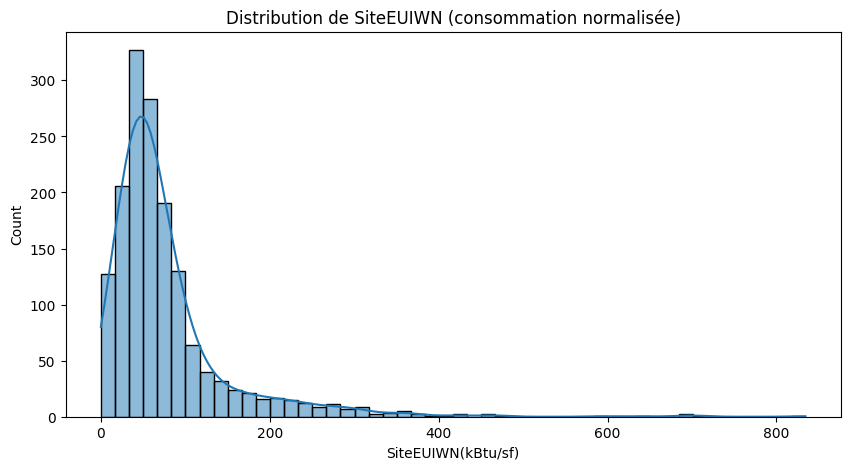

In [253]:
plt.figure(figsize=(10,5))
sns.histplot(df["SiteEUIWN(kBtu/sf)"], bins=50, kde=True)
plt.title("Distribution de SiteEUIWN (consommation normalisée)")
plt.show()


Distribution de la surface totale : PropertyGFATotal

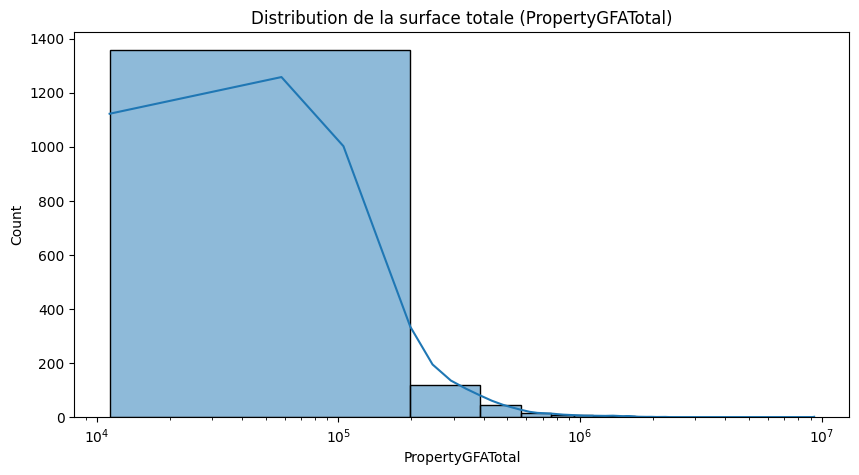

In [254]:
plt.figure(figsize=(10,5))
sns.histplot(df["PropertyGFATotal"], bins=50, kde=True)
plt.title("Distribution de la surface totale (PropertyGFATotal)")
plt.xscale("log")  
plt.show()


Distribution de l’année de construction

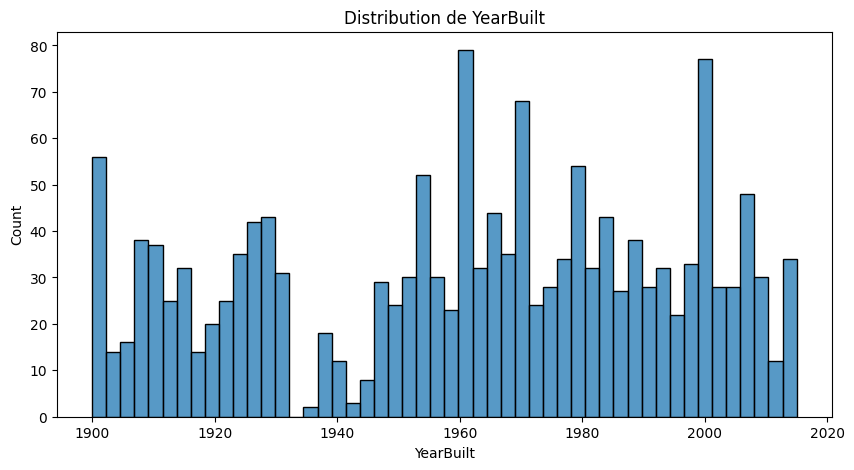

In [255]:
plt.figure(figsize=(10,5))
sns.histplot(df["YearBuilt"], bins=50, kde=False)
plt.title("Distribution de YearBuilt")
plt.show()



2.2 — Analyse des valeurs aberrantes (outliers)

Boxplot de la cible

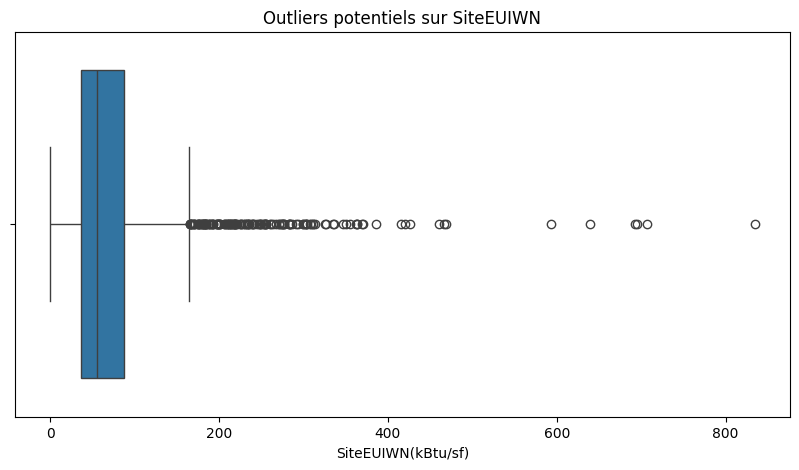

In [256]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["SiteEUIWN(kBtu/sf)"])
plt.title("Outliers potentiels sur SiteEUIWN")
plt.show()


Boxplot des surfaces

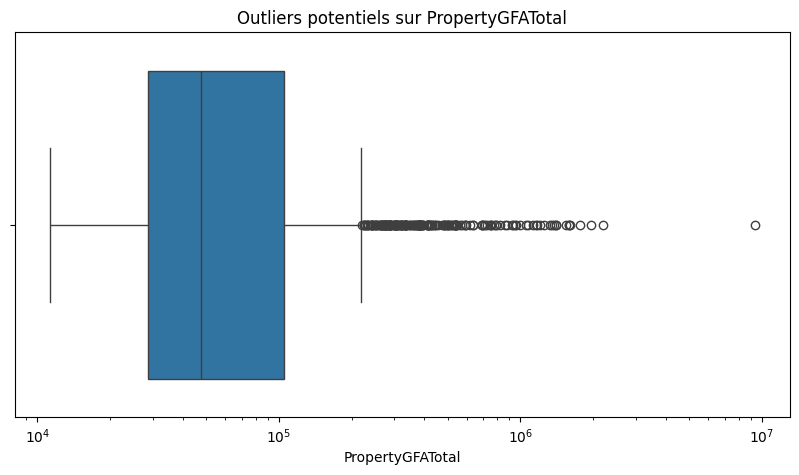

In [257]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["PropertyGFATotal"])
plt.xscale("log")
plt.title("Outliers potentiels sur PropertyGFATotal")
plt.show()


📌 2.3 — Relations entre variables (quanti vs quanti)


 Surface vs consommation normalisée

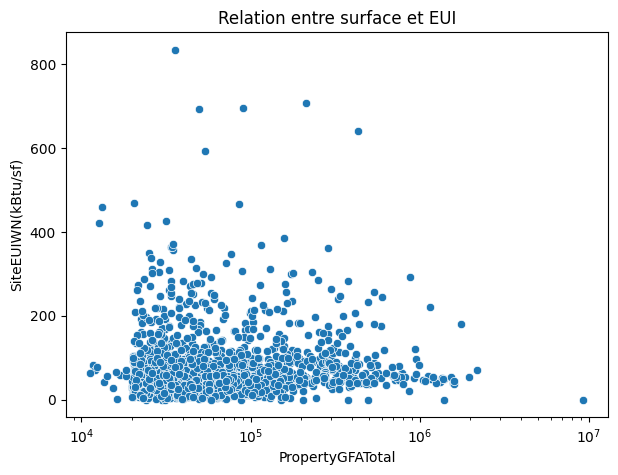

In [258]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["PropertyGFATotal"], y=df["SiteEUIWN(kBtu/sf)"])
plt.xscale("log")
plt.title("Relation entre surface et EUI")
plt.show()


Corrélations numériques (heatmap)

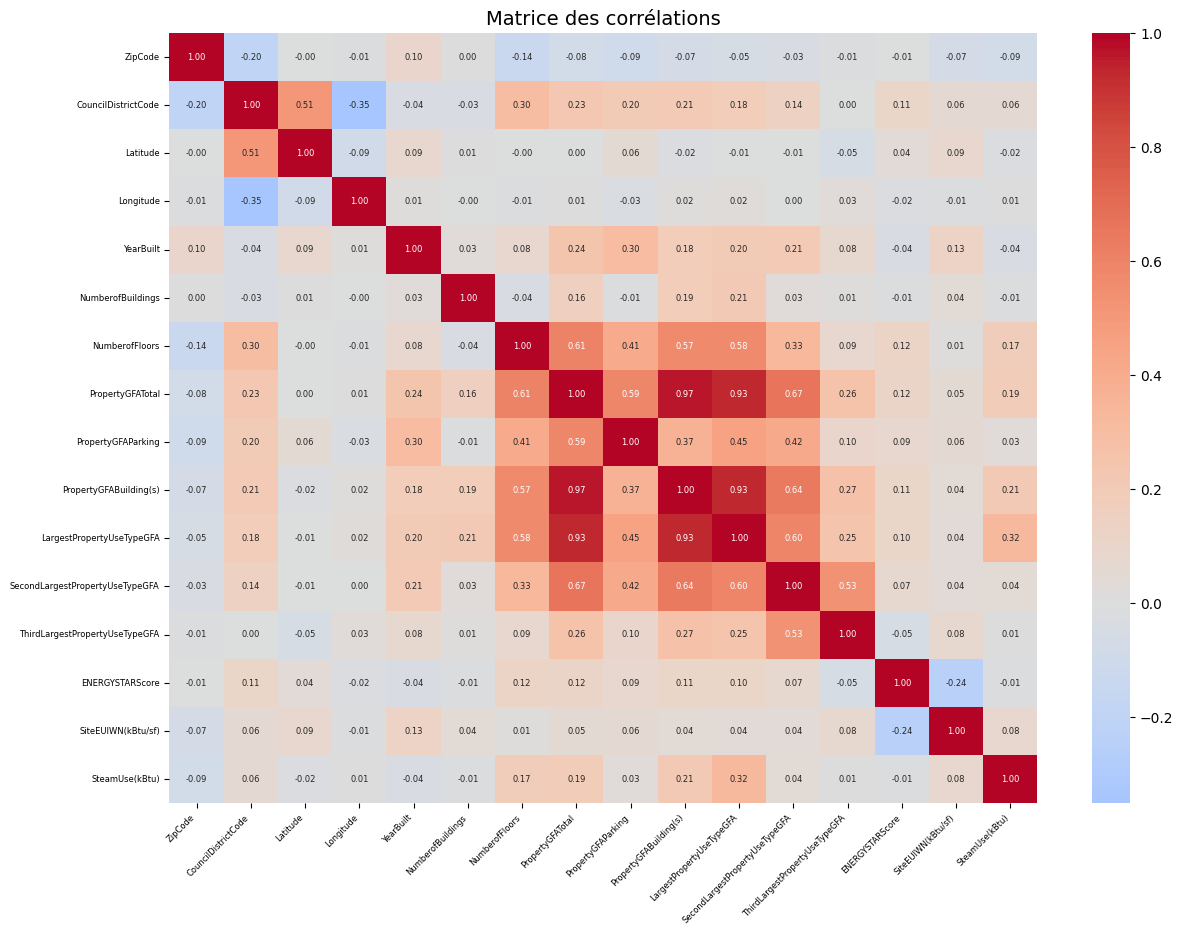

In [259]:
plt.figure(figsize=(14, 10))
corr = df_clean.select_dtypes(include=[np.number]).corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    annot_kws={"size": 6},   
    fmt=".2f"
)

plt.title("Matrice des corrélations", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=6)  
plt.yticks(fontsize=6)
plt.show()

2.4 — Relations quali vs quanti

EUI selon le type de propriété

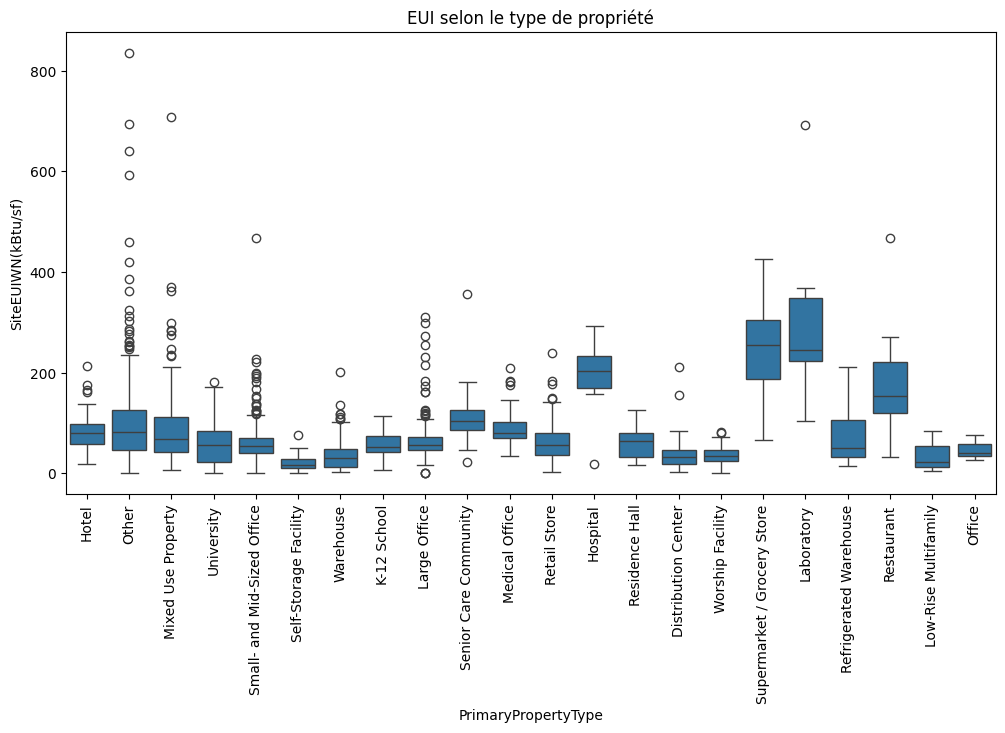

In [260]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="PrimaryPropertyType", y="SiteEUIWN(kBtu/sf)")
plt.xticks(rotation=90)
plt.title("EUI selon le type de propriété")
plt.show()


2.5 — Analyse des valeurs manquantes (visualisation)

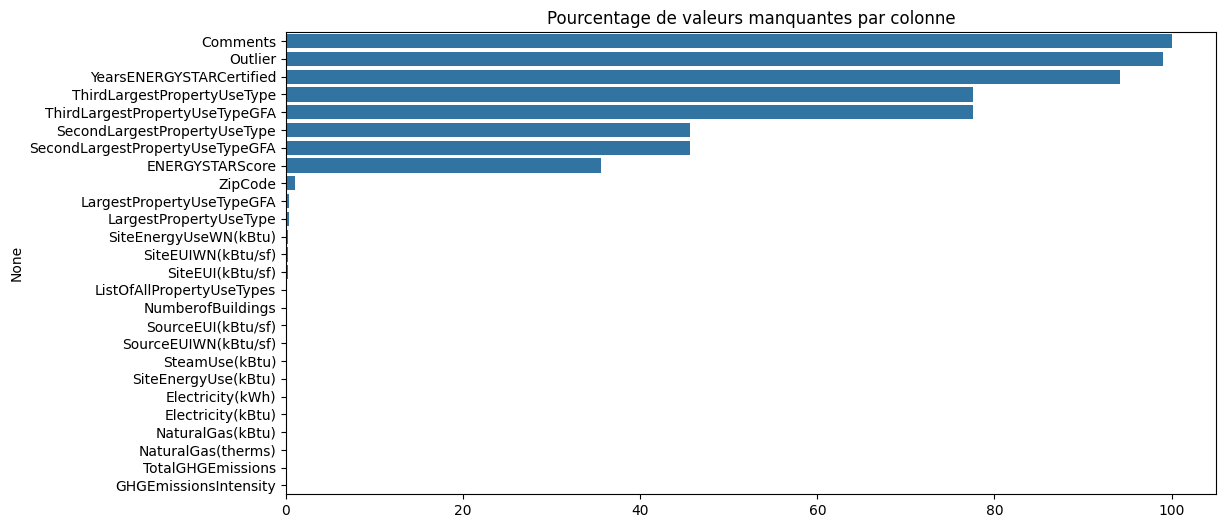

In [261]:
missing_pct = (df.isna().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=missing_pct.values, y=missing_pct.index)
plt.title("Pourcentage de valeurs manquantes par colonne")
plt.show()


2.6 — Diagnostic final et colonnes candidates à suppression

Colonnes candidates à suppression

- Comments : 100% vide → inutile
- Outlier : > 99% NA → utilisé uniquement pour filtrer les lignes hors-norme, puis supprimé
- ComplianceStatus : utilisé pour exclure les non-compliants → supprimé ensuite
- DefaultData : utilisé pour exclure éventuellement les valeurs par défaut → supprimé ensuite
- State : toujours "WA"
- City : toujours "Seattle"
- DataYear : toujours 2016 → constante
- OSEBuildingID : identifiant technique → non pertinent pour le modèle
- TaxParcelIdentificationNumber : identifiant administratif → non pertinent
- PropertyName, Address → identifiants uniques, inutilisables en ML

Colonnes dupliquées en unité :
- Electricity(kWh) / Electricity(kBtu) → garder une seule unité
- NaturalGas(therms) / NaturalGas(kBtu) → garder une seule unité

Colonnes liées directement ou indirectement à la target (risque de data leakage) :
- SiteEUI(kBtu/sf)
- SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf)
- SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu)
- Electricity(kBtu) (si pas supprimée plus haut)
- NaturalGas(kBtu) (idem)
- Steam(kBtu), DistrictHeating(kBtu), DistrictCooling(kBtu)
- GHGEmissionsIntensity, TotalGHGEmissions

2.7 — Synthèse EDA

###  Synthèse de l’EDA


- La variable cible `SiteEUIWN(kBtu/sf)` est asymétrique (queue à droite) → nécessite une transformation (log) ou un modèle robuste.
- Les surfaces (`PropertyGFATotal` et dérivées) présentent des valeurs extrêmes → outliers à filtrer ou à traiter.
- Plusieurs colonnes possèdent plus de 90% de valeurs manquantes ou sont des identifiants → candidates à la suppression.
- Les variables énergétiques brutes et dérivées (SiteEUI, SourceEUI*, SiteEnergyUse*, GHGEmissions*, etc.) sont fortement corrélées entre elles et avec la cible → exclues des features pour éviter la fuite de données.
- Les types de propriétés (`PrimaryPropertyType`, usages principaux) influencent fortement le niveau d’EUI normalisé.
- La distribution de l’année de construction des bâtiments (1900–2015) est large → effet probable de l’âge sur la performance énergétique.

### PHASE 3 — NETTOYAGE & PRÉPARATION DU JEU DE DONNÉES

Objectifs :

- supprimer les colonnes inutiles
- filtrer les valeurs aberrantes
- gérer les valeurs manquantes
- préparer un dataset propre pour la modélisation
- basé sur l’EDA et les bonnes pratiques ML

In [262]:
cols_to_drop = [
    # inutiles
    "Comments",
    "State",
    "City",
    "DataYear",
    "TaxParcelIdentificationNumber",
    "PropertyName",
    "Address",
    "OSEBuildingID",

    # toutes les consommations énergétiques 
    "Electricity(kWh)",
    "Electricity(kBtu)",
    "NaturalGas(therms)",
    "NaturalGas(kBtu)",
    "Steam(kBtu)",
    "DistrictHeating(kBtu)",
    "DistrictCooling(kBtu)",

    # agrégats et dérivés de la target
    "SiteEnergyUse(kBtu)",
    "SiteEnergyUseWN(kBtu)",
    "SiteEUI(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "GHGEmissionsIntensity",
    "TotalGHGEmissions",
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("Colonnes supprimées :", cols_to_drop)
print("Nouvelle shape :", df.shape)


Colonnes supprimées : ['Comments', 'State', 'City', 'DataYear', 'TaxParcelIdentificationNumber', 'PropertyName', 'Address', 'OSEBuildingID', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'Steam(kBtu)', 'DistrictHeating(kBtu)', 'DistrictCooling(kBtu)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'GHGEmissionsIntensity', 'TotalGHGEmissions']
Nouvelle shape : (1569, 27)


3.2 — Filtrage des valeurs aberrantes

3.2.1 Filtrage par qualité des données (ComplianceStatus, DefaultData, Outlier)

In [263]:
n0 = len(df)

# 1) Garder uniquement les bâtiments conformes
n_before = len(df)
df = df[df["ComplianceStatus"] == "Compliant"]
print(f"Lignes non conformes supprimées : {n_before - len(df)}")

# 2) Exclure les lignes "DefaultData = True" si la colonne existe
if "DefaultData" in df.columns:
    n_before = len(df)
    df = df[df["DefaultData"] == False]
    print(f"Lignes avec données par défaut supprimées : {n_before - len(df)}")

# 3) Exclure les lignes explicitement marquées comme outliers
if "Outlier" in df.columns:
    n_before = len(df)
    df = df[df["Outlier"].isna()]   # on conserve uniquement Outlier = NaN
    print(f"Lignes marquées comme outliers supprimées : {n_before - len(df)}")

print(f"Total lignes supprimées (qualité) : {n0 - len(df)}")
print("Shape après filtrage qualité :", df.shape)


Lignes non conformes supprimées : 32
Lignes avec données par défaut supprimées : 0
Lignes marquées comme outliers supprimées : 0
Total lignes supprimées (qualité) : 32
Shape après filtrage qualité : (1537, 27)


3.2.2. Surface totale incohérente (PropertyGFATotal)

In [264]:
n_before = len(df)

# valeurs impossibles
df = df[df["PropertyGFATotal"] > 0]

# couper les valeurs extrêmes au-dessus du 99e percentile
upper = df["PropertyGFATotal"].quantile(0.99)
df = df[df["PropertyGFATotal"] < upper]

print(f"Lignes supprimées sur PropertyGFATotal : {n_before - len(df)}")
print("Shape après filtrage des surfaces :", df.shape)


Lignes supprimées sur PropertyGFATotal : 16
Shape après filtrage des surfaces : (1521, 27)


3.2.3. Nettoyage des colonnes de qualité

In [265]:
quality_cols = ["Outlier", "ComplianceStatus", "DefaultData"]
df = df.drop(columns=[c for c in quality_cols if c in df.columns])

print("Colonnes de qualité supprimées :", [c for c in quality_cols if c in df.columns])
print("Shape finale après filtrage des valeurs aberrantes :", df.shape)

Colonnes de qualité supprimées : []
Shape finale après filtrage des valeurs aberrantes : (1521, 24)


3.3 — GESTION DES VALEURS MANQUANTES

3.3.1 — Colonnes structurelles → médiane

In [266]:
struct_cols = ["NumberofBuildings", "NumberofFloors", "PropertyGFAParking"]

for col in struct_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


3.3.2 — Colonnes catégorielles → "Unknown"

In [267]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].fillna("Unknown")


3.3.3 — Colonnes numériques restantes → moyenne

In [268]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())


3.3.4 — Dernier contrôle NA

In [269]:
df.isna().sum().sort_values(ascending=False).head(10)


BuildingType           0
PrimaryPropertyType    0
ZipCode                0
CouncilDistrictCode    0
Neighborhood           0
Latitude               0
Longitude              0
YearBuilt              0
NumberofBuildings      0
NumberofFloors         0
dtype: int64

3.5 — NORMALISATION DES VARIABLES

In [270]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# On part du df déjà nettoyé
df_clean = df.copy()

TARGET = "SiteEUIWN(kBtu/sf)"

# Colonnes numériques à normaliser (sans la cible)
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != TARGET]

scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

print("Normalisation OK")
print("Nombre de variables normalisées :", len(num_cols))


Normalisation OK
Nombre de variables normalisées : 15


3.6 — Dataframe final pour la modélisation

In [271]:
print("Dataset final prêt pour la modélisation :", df_clean.shape)
df_clean.head()


Dataset final prêt pour la modélisation : (1521, 24)


,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SteamUse(kBtu)
0,NonResidential,Hotel,-0.849564,1.179727,DOWNTOWN,-0.087917,-0.191400,-1.046321,-0.085712,1.386984,...,Hotel,0.048366,Unknown,0.000000,Unknown,-1.286201e-16,Unknown,-0.136862,84.300003,0.638124
1,NonResidential,Hotel,-0.849564,1.179727,DOWNTOWN,-0.067236,-0.016761,1.055313,-0.085712,1.213168,...,Hotel,0.008998,Parking,-0.407434,Restaurant,-5.479589e-01,Unknown,-0.093561,97.900002,-0.127222
2,NonResidential,Hotel,-0.849564,1.179727,DOWNTOWN,-0.051033,-0.196131,0.232934,-0.085712,6.427641,...,Hotel,5.823632,Unknown,0.000000,Unknown,-1.286201e-16,Unknown,-0.872981,97.699997,8.109730
3,NonResidential,Hotel,-0.849564,1.179727,DOWNTOWN,-0.046983,-0.133330,-1.076780,-0.085712,1.039352,...,Hotel,-0.186030,Unknown,0.000000,Unknown,-1.286201e-16,Unknown,-0.310066,113.300003,0.718546
4,NonResidential,Hotel,0.236150,1.179727,DOWNTOWN,-0.054871,-0.298076,0.567977,-0.085712,2.429878,...,Hotel,0.351031,Parking,0.859104,Swimming Pool,-8.747789e-01,Unknown,0.512655,118.699997,-0.127222


In [272]:
df_clean.to_csv("df_clean.csv", index=False)


PHASE 3 — SYNTHÈSE

###  Synthèse Phase 3 — Nettoyage et Préparation

Colonnes inutiles supprimées

- identifiants uniques (PropertyName, Address, OSEBuildingID, TaxParcelIdentificationNumber)
- constantes (State, City, DataYear)
- consommations énergétiques brutes et dérivées de la cible (Electricity*, NaturalGas*, SiteEnergyUse*, SourceEUI*, GHGEmissions*, etc.).

Filtrage des enregistrements et des outliers :

- exclusion des bâtiments non conformes (ComplianceStatus), des données par défaut (DefaultData) et des lignes marquées Outlier
- filtrage sur PropertyGFATotal (valeurs ≤ 0 et > 99ᵉ percentile retirées).

Gestion intelligente des valeurs manquantes :

- variables structurelles (NumberofBuildings, NumberofFloors, PropertyGFAParking) → médiane
- variables catégorielles → remplacement des NA par "Unknown"
- autres variables numériques → imputation par la moyenne.
- Encodage one-hot des variables catégorielles.
- Normalisation des variables numériques (hors cible SiteEUIWN(kBtu/sf)).

Dataset final prêt pour la modélisation supervisée ⇒ df_clean.


